In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
sns.set(color_codes=True)

iris = datasets.load_iris()

X=iris.data
y=iris.target

dataset = np.insert(iris.data, 0, iris.target,axis=1)

df = pd.DataFrame(data=dataset, columns=['iris_id'] + iris.feature_names)
df['species'] = df['iris_id'].map(lambda x: 'setosa' if x == 0 else 'versicolor' if x == 1 else 'virginica')

df.head()

ModuleNotFoundError: No module named 'seaborn'

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Importing the dataset and visualize it

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
sns.set(color_codes=True)

iris = datasets.load_iris()

X=iris.data
y=iris.target

dataset = np.insert(iris.data, 0, iris.target,axis=1)

df = pd.DataFrame(data=dataset, columns=['iris_id'] + iris.feature_names)
df['species'] = df['iris_id'].map(lambda x: 'setosa' if x == 0 else 'versicolor' if x == 1 else 'virginica')

df.head()

,iris_id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.0,5.1,3.5,1.4,0.2,setosa
1,0.0,4.9,3.0,1.4,0.2,setosa
2,0.0,4.7,3.2,1.3,0.2,setosa
3,0.0,4.6,3.1,1.5,0.2,setosa
4,0.0,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,iris_id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.350000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
Checking the class distribution


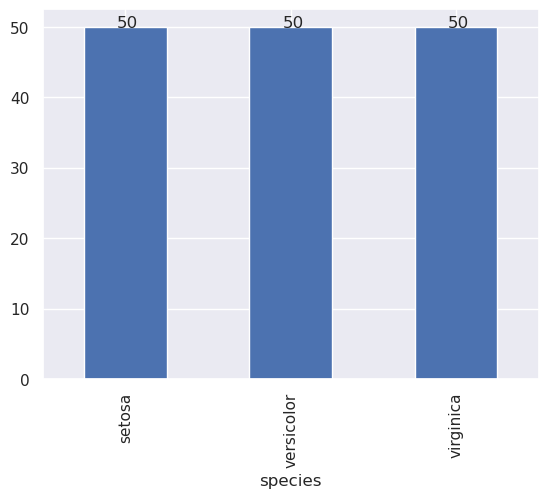

In [5]:
ax = df.groupby(df['species'])['species'].count().plot(kind='bar')
x_offset = -0.05
y_offset = 0
for p in ax.patches:
    b = p.get_bbox()
    val = "{}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [ ]:
Correlation Matrix

In [6]:
corr = df.corr()

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt="f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)

ValueError: could not convert string to float: 'setosa'

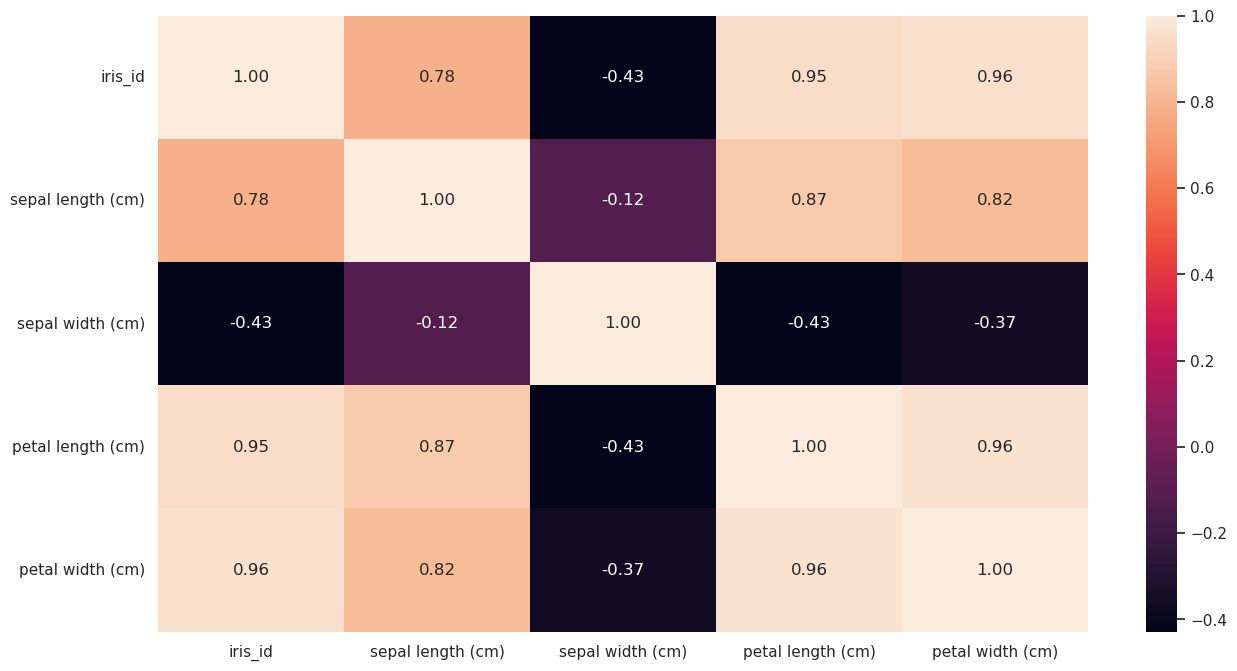

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".2f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)

plt.show()


In [ ]:
Pairplots & histograms

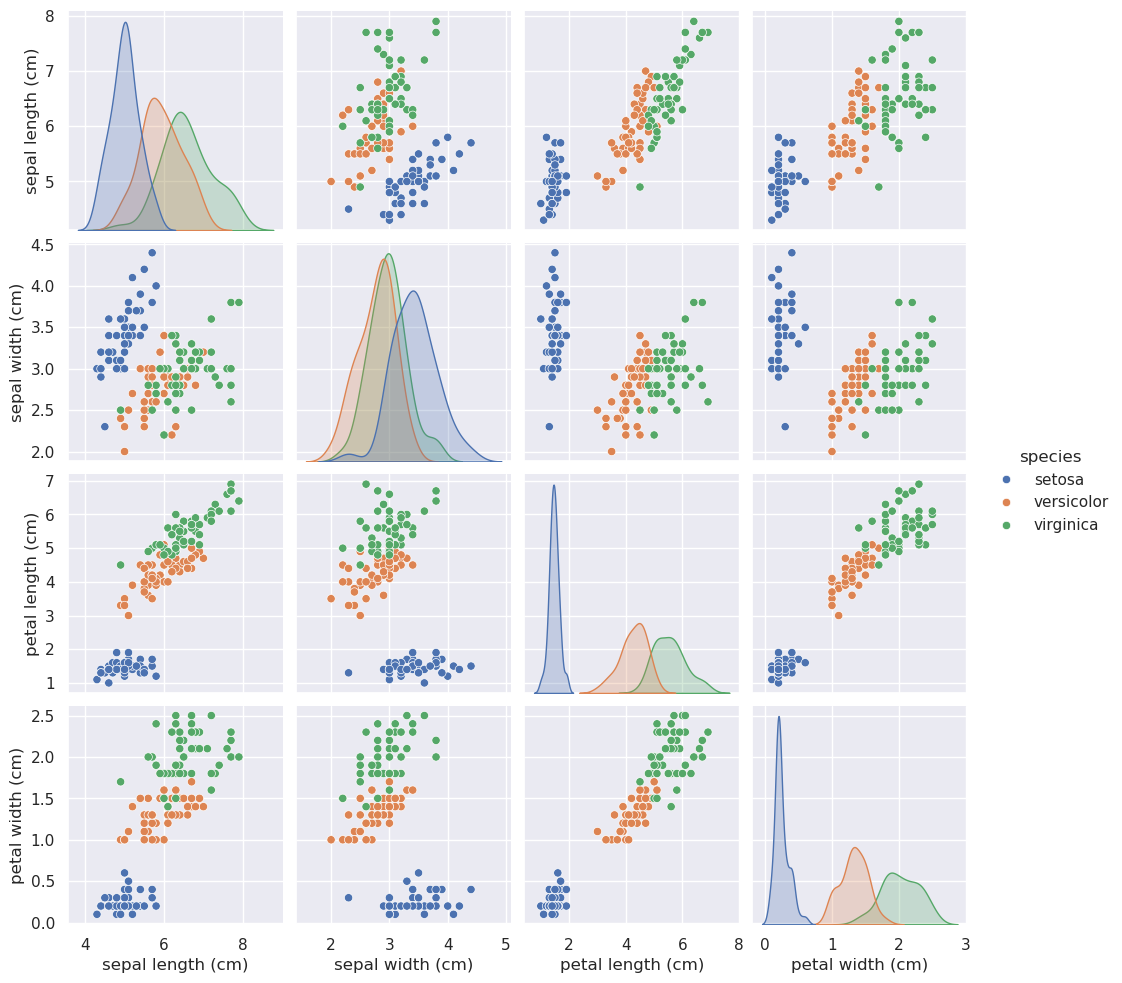

In [8]:
sns.pairplot(df.drop(['iris_id'], axis=1), hue='species', height=2.5, diag_kind="kde")

In [ ]:
Now with linear regression

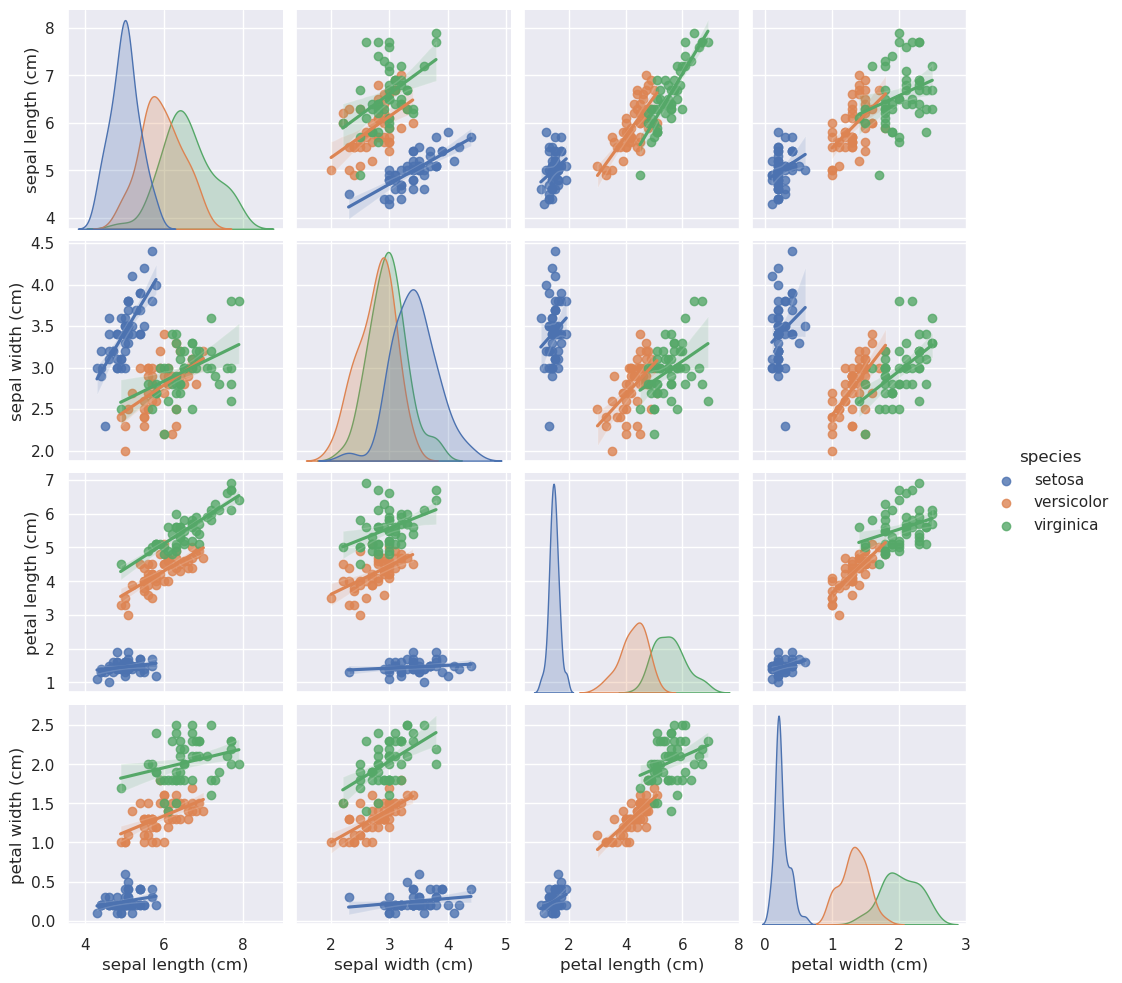

In [9]:
sns.pairplot(df.drop(['iris_id'], axis=1), kind="reg", hue='species', height=2.5,diag_kind="kde")

In [ ]:
Fit a plot a kernel density estimate.
We can see in this dimension an overlaping between versicolor and virginica. This is a better representation of what we identified above.

In [10]:
tmp_df = df[(df.iris_id==0.0)]
sns.kdeplot(tmp_df['petal width (cm)'], tmp_df['petal length (cm)'], bw='silverman', cmap="Blues", shade=False, shade_lowest=False)

tmp_df = df[(df.iris_id==1.0)]
sns.kdeplot(tmp_df['petal width (cm)'], tmp_df['petal length (cm)'], bw='silverman', cmap="Greens", shade=False, shade_lowest=False)

tmp_df = df[(df.iris_id==2.0)]
sns.kdeplot(tmp_df['petal width (cm)'], tmp_df['petal length (cm)'], bw='silverman', cmap="Reds", shade=False, shade_lowest=False)

plt.xlabel('species')

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

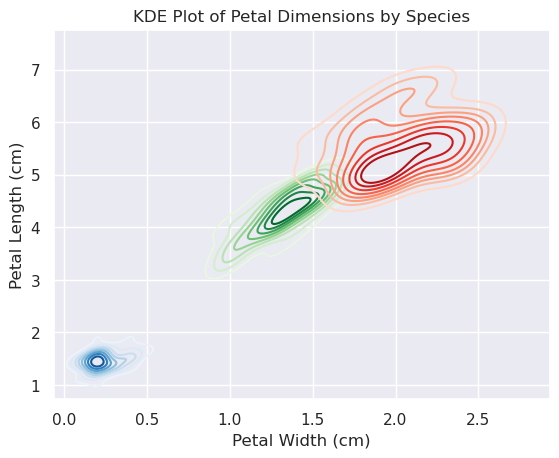

In [11]:
# Plot KDE plots for each species
tmp_df = df[df.iris_id == 0.0]
sns.kdeplot(
    x=tmp_df['petal width (cm)'], 
    y=tmp_df['petal length (cm)'], 
    bw_adjust=1,  # Bandwidth adjustment
    cmap="Blues", 
    fill=False,  # Shade replaced `shade=False`
    thresh=0  # Equivalent to `shade_lowest=False`
)

tmp_df = df[df.iris_id == 1.0]
sns.kdeplot(
    x=tmp_df['petal width (cm)'], 
    y=tmp_df['petal length (cm)'], 
    bw_adjust=1, 
    cmap="Greens", 
    fill=False, 
    thresh=0
)

tmp_df = df[df.iris_id == 2.0]
sns.kdeplot(
    x=tmp_df['petal width (cm)'], 
    y=tmp_df['petal length (cm)'], 
    bw_adjust=1, 
    cmap="Reds", 
    fill=False, 
    thresh=0
)

# Label the x-axis
plt.xlabel('Petal Width (cm)')

# Label the y-axis
plt.ylabel('Petal Length (cm)')

# Add a title
plt.title('KDE Plot of Petal Dimensions by Species')

plt.show()


In [ ]:
Petal length and petal width have the highest linear correlation with our label. Also, sepal width seems to be useless, considering the linear correlation with our label.

Since versicolor and virginica cannot be split linearly, we need a more versatile algorithm to create a better classifier. In this case, we'll use XGBoost, a tree ensemble that can give us a good model for predicting the flower.

In [ ]:
let's split the dataset into training and test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
yX_train = np.column_stack((y_train, X_train))
yX_test = np.column_stack((y_test, X_test))
np.savetxt("iris_train.csv", yX_train, delimiter=",", fmt='%0.3f')
np.savetxt("iris_test.csv", yX_test, delimiter=",", fmt='%0.3f')

In [ ]:
 train our model with the builtin algorithm XGBoost

In [13]:
import sagemaker
import boto3

from sagemaker import get_execution_role
from sklearn.model_selection import train_test_split

role = get_execution_role()

prefix='mlops/iris'
# Retrieve the default bucket
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
assert(sagemaker.__version__ >= "2.0")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [14]:
import sagemaker
import boto3
from sagemaker import get_execution_role
from sklearn.model_selection import train_test_split

# Check SageMaker version
assert sagemaker.__version__ >= "2.0", "Please upgrade the SageMaker SDK to version 2.0 or higher."

# Get the execution role
try:
    role = get_execution_role()
    print(f"Execution Role: {role}")
except Exception as e:
    print("Failed to retrieve the execution role. Ensure this is running within a SageMaker Notebook instance.")
    raise e

# Define S3 bucket and prefix
prefix = 'mlops/iris'

# Initialize SageMaker session
try:
    sagemaker_session = sagemaker.Session()
    bucket = sagemaker_session.default_bucket()
    print(f"Default S3 Bucket: {bucket}")
except Exception as e:
    print("Failed to initialize the SageMaker session or retrieve the default bucket.")
    raise e

# Example: Splitting dataset into train and test (place your dataset here)
# Assuming you have a Pandas DataFrame `df`
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Print completion
print("SageMaker environment initialized successfully!")


Execution Role: arn:aws:iam::853973692277:role/service-role/AmazonSageMaker-ExecutionRole-20250111T145028
Default S3 Bucket: sagemaker-us-east-1-853973692277
SageMaker environment initialized successfully!


In [ ]:
Let's continue, upload the dataset and train the model

In [15]:
# Upload the dataset to an S3 bucket
input_train = sagemaker_session.upload_data(path='iris_train.csv', key_prefix='%s/data' % prefix)
input_test = sagemaker_session.upload_data(path='iris_test.csv', key_prefix='%s/data' % prefix)

In [16]:
train_data = sagemaker.inputs.TrainingInput(s3_data=input_train,content_type="csv")
test_data = sagemaker.inputs.TrainingInput(s3_data=input_test,content_type="csv")

In [17]:
# get the URI for new container
container_uri = sagemaker.image_uris.retrieve('xgboost', boto3.Session().region_name, version='1.0-1')

# Create the estimator
xgb = sagemaker.estimator.Estimator(container_uri,
                                    role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sagemaker_session)
# Set the hyperparameters
xgb.set_hyperparameters(eta=0.1,
                        max_depth=10,
                        gamma=4,
                        num_class=len(np.unique(y)),
                        alpha=10,
                        min_child_weight=6,
                        silent=0,
                        objective='multi:softmax',
                        num_round=30)

In [ ]:
Train the model

In [18]:
%%time
# takes around 3min 11s
xgb.fit({'train': train_data, 'validation': test_data, })

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-01-11-12-44-22-752


2025-01-11 12:44:24 Starting - Starting the training job...
2025-01-11 12:44:38 Starting - Preparing the instances for training...
2025-01-11 12:45:14 Downloading - Downloading input data...
2025-01-11 12:45:49 Downloading - Downloading the training image......
2025-01-11 12:46:55 Training - Training image download completed. Training in progress.
2025-01-11 12:46:55 Uploading - Uploading generated training model[2025-01-11 12:46:46.874 ip-10-0-197-23.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root

In [ ]:
Deploy the model and create an endpoint for it
The following action will:

get the assets from the job we just ran and then create an input in the Models Catalog
create a endpoint configuration (a metadata for our final endpoint)
create an endpoint, which is our model wrapped in a format of a WebService
After that we'll be able to call our deployed endpoint for doing predictions



In [19]:
%%time
# Enable log capturing in the endpoint
data_capture_configuration = sagemaker.model_monitor.data_capture_config.DataCaptureConfig(
    enable_capture=True, 
    sampling_percentage=100, 
    destination_s3_uri='s3://{}/{}/monitoring'.format(bucket, prefix), 
    sagemaker_session=sagemaker_session
)
xgb_predictor = xgb.deploy(
    initial_instance_count=1, 
    instance_type='ml.m4.xlarge',
    data_capture_config=data_capture_configuration
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-01-11-12-47-40-306
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-01-11-12-47-40-306
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-01-11-12-47-40-306


------!CPU times: user 130 ms, sys: 25.4 ms, total: 156 ms
Wall time: 3min 32s


In [ ]:
Part 2/4 - Optimizing the model
Now that you know how to train a ML model using SageMaker, it's time to optimize it using Automatic Model Tuning or Hyperparameter optimization. This is a powerful technique that explores the space of possible values for the selected hyperparameters and tries to find the best combination based on a given metric. You can also select the strategy you want to execute based on that metric, for instance: If my objective function (metric) is Acuraccy, then I will select the Maximize stragegy. If my metric is Error, then I will select Minimize.

In [ ]:
Let's start by recreating the estimator

In [25]:
import sagemaker
import boto3
import numpy as np

from sagemaker import get_execution_role
from sklearn.model_selection import train_test_split
from sklearn import datasets

role = get_execution_role()

prefix='mlops/iris'
# Retrieve the default bucket
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
assert(sagemaker.__version__ >= "2.0")

In [ ]:
Preparing the dataset and uploading it


In [26]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
yX_train = np.column_stack((y_train, X_train))
yX_test = np.column_stack((y_test, X_test))
np.savetxt("iris_train.csv", yX_train, delimiter=",", fmt='%0.3f')
np.savetxt("iris_test.csv", yX_test, delimiter=",", fmt='%0.3f')

# Upload the dataset to an S3 bucket
input_train = sagemaker_session.upload_data(path='iris_train.csv', key_prefix='%s/data' % prefix)
input_test = sagemaker_session.upload_data(path='iris_test.csv', key_prefix='%s/data' % prefix)

train_data = sagemaker.inputs.TrainingInput(s3_data=input_train,content_type="csv")
test_data = sagemaker.inputs.TrainingInput(s3_data=input_test,content_type="csv")

In [27]:
# get the URI for new container
container_uri = sagemaker.image_uris.retrieve('xgboost', boto3.Session().region_name, version='1.0-1')

# Create the estimator
xgb = sagemaker.estimator.Estimator(container_uri,
                                    role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sagemaker_session)
# Set the hyperparameters
xgb.set_hyperparameters(num_class=len(np.unique(y)),
                        silent=0,
                        objective='multi:softmax',
                        num_round=30)


INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


In [ ]:
Hyperparameter Tuning Jobs
A.K.A. Hyperparameter Optimization
We know that the iris dataset is an easy challenge. We can achieve a better score with XGBoost. However, we don't want to waste time testing all the possible variations of the hyperparameters in order to optimize the training process.

Instead, we'll use the Sagemaker's tuning feature. For that, we'll use the same estimator, but let's create a Tuner and ask it for optimize the model for us.

In [24]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges = {'eta': ContinuousParameter(0, 1),
                        'min_child_weight': ContinuousParameter(1, 10),
                        'alpha': ContinuousParameter(0, 2),
                         'gamma': ContinuousParameter(0, 10),
                        'max_depth': IntegerParameter(1, 10)}

objective_metric_name = 'validation:merror'

tuner = HyperparameterTuner(xgb,
                            objective_metric_name,
                            hyperparameter_ranges,
                            max_jobs=20,
                            max_parallel_jobs=4,
                            objective_type='Minimize')

tuner.fit({'train': train_data, 'validation': test_data, })
tuner.wait()

INFO:sagemaker:Creating hyperparameter tuning job with name: sagemaker-xgboost-250111-1253


.........................................................................!
!


In [28]:
job_name = tuner.latest_tuning_job.name
attached_tuner = HyperparameterTuner.attach(job_name)
xgb_predictor = attached_tuner.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')


2025-01-11 12:58:30 Starting - Found matching resource for reuse
2025-01-11 12:58:30 Downloading - Downloading the training image
2025-01-11 12:58:30 Training - Training image download completed. Training in progress.
2025-01-11 12:58:30 Uploading - Uploading generated training model
2025-01-11 12:58:30 Completed - Resource retained for reuse

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-01-11-12-59-33-677


INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-250111-1253-017-02260edf
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-250111-1253-017-02260edf


--------!

In [31]:
endpoint_name = xgb_predictor.endpoint_name
model_name = boto3.client('sagemaker').describe_endpoint_config(
    EndpointConfigName=endpoint_name
)['ProductionVariants'][0]['ModelName']
!echo $model_name > model_name.txt
!echo $endpoint_name > endpoint_name2.txt

In [ ]:
A simple test before we move on

In [32]:
from sagemaker.serializers import CSVSerializer
from sklearn.metrics import f1_score
csv_serializer = CSVSerializer()
xgb_predictor.serializer = csv_serializer

In [33]:
predictions_test = [ float(xgb_predictor.predict(x).decode('utf-8')) for x in X_test] 
score = f1_score(y_test,predictions_test,labels=[0.0,1.0,2.0],average='micro')

print('F1 Score(micro): %.1f' % (score * 100.0))

F1 Score(micro): 94.0


In [ ]:
Part 3/4 - Batch Prediction
Batch transform job
If you have a file with the samples you want to predict, just upload that file to an S3 bucket and start a Batch Transform job. For this task, you don't need to deploy an endpoint. Sagemaker will create all the resources needed to do this batch prediction, save the results into an S3 bucket and then it will destroy the resources automatically for you